In [4]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2008-01-01", "2023-01-01", auto_adjust=True)
data.head() #NG=F

Enter the code of the stock: NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [20]:
data.shape

(3777, 5)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3777 entries, 2008-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3777 non-null   float64
 1   High    3777 non-null   float64
 2   Low     3777 non-null   float64
 3   Close   3777 non-null   float64
 4   Volume  3777 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.0 KB


In [22]:
data.describe

<bound method NDFrame.describe of              Open   High    Low  Close  Volume
Date                                          
2008-01-02  7.572  7.876  7.564  7.850   68553
2008-01-03  7.873  7.980  7.610  7.674   72742
2008-01-04  7.652  7.859  7.500  7.841   61496
2008-01-07  7.803  7.940  7.701  7.879   56675
2008-01-08  7.909  7.997  7.880  7.967   53775
...           ...    ...    ...    ...     ...
2022-12-23  5.093  5.245  4.825  5.079   42105
2022-12-27  5.283  5.367  5.081  5.282   41154
2022-12-28  5.183  5.183  4.588  4.709  115022
2022-12-29  4.767  4.790  4.422  4.559   78441
2022-12-30  4.558  4.615  4.378  4.475   62281

[3777 rows x 5 columns]>

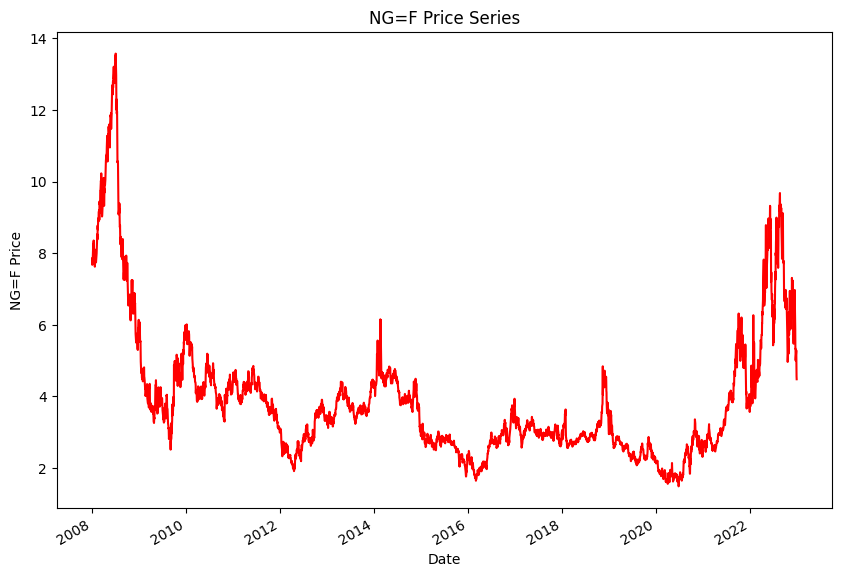

In [24]:
data.Close.plot(figsize = (10, 7), color = 'r')
plt.ylabel("{} Price".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

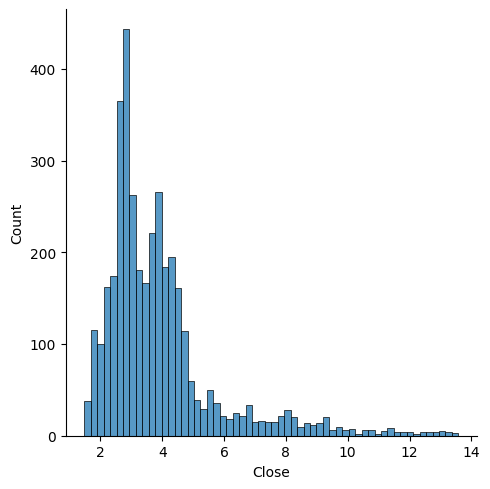

In [26]:
sns.displot(data['Close'])

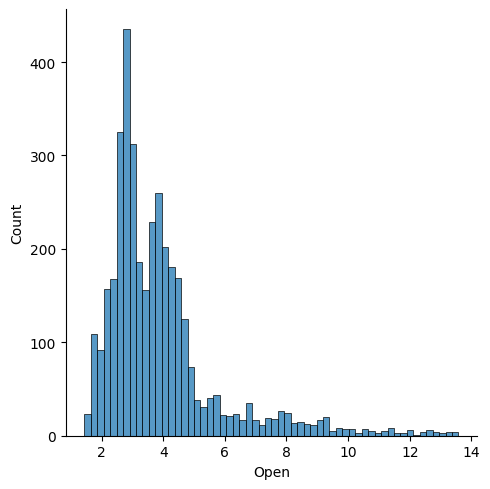

In [28]:
sns.displot(data['Open'])

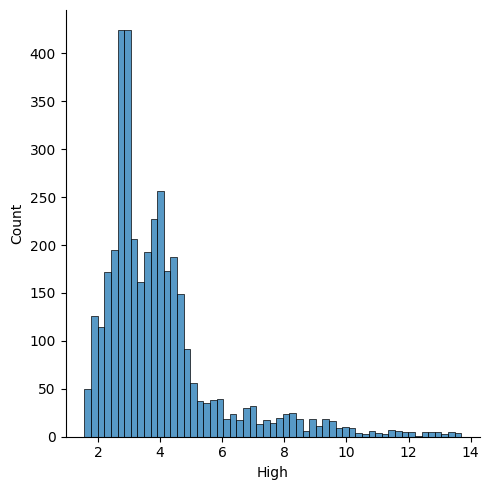

In [31]:
sns.displot(data['High'])

#Conclusion

*Shape of the data

*how our data is distributed 

*its very very non-linear


In [33]:
x = data.drop("Close", axis = 1)
y = data['Close']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3021, 4)
(756, 4)
(3021,)
(756,)


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)


#MSE -----> MEAN SQUARED ERROR

#RMSE ----> SQRT(MSE)

#r2_Square ---> value = 1.0 (good model)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
#y_test = ground truth
#y_pred = model prediction value 

  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2_scores = r2_score(y_test, y_pred)

  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2_Score: ", r2_scores)

calculate_metrics(y_test, pred1)

MSE:  0.0030471928621927987
RMSE:  0.055201384603946295
R2_Score:  0.9991248027943621


#Lasso

In [42]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train, y_train)
la = Ridge().fit(x_train, y_train)

la_p = la.predict(x_test)
ri_p = la.predict(x_test)


In [44]:
calculate_metrics(y_test, la_p)

MSE:  0.003008499469998537
RMSE:  0.05484979006339529
R2_Score:  0.9991359160878938


In [46]:
calculate_metrics(y_test, ri_p)

MSE:  0.003008499469998537
RMSE:  0.05484979006339529
R2_Score:  0.9991359160878938


In [47]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

scr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit= True, verbose= 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.079 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.055 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.057 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.052 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.079 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.054 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.056 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.051 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.077 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [55]:
svr = SVR(C=10, gamma = 0.01, kernel = 'rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [54]:
#import joblib

#joblib.dump('model.pkl')

#ridge_from_joblib = model = joblib.load('model.pkl')